In [109]:
import requests
import json

In [110]:

username = "aarushiksk"
url = "https://api.github.com/users/{}".format(username)
response = requests.get(url)
output= json.loads(response.text)
print(output)


{'login': 'aarushiksk', 'id': 92772439, 'node_id': 'U_kgDOBYeYVw', 'avatar_url': 'https://avatars.githubusercontent.com/u/92772439?v=4', 'gravatar_id': '', 'url': 'https://api.github.com/users/aarushiksk', 'html_url': 'https://github.com/aarushiksk', 'followers_url': 'https://api.github.com/users/aarushiksk/followers', 'following_url': 'https://api.github.com/users/aarushiksk/following{/other_user}', 'gists_url': 'https://api.github.com/users/aarushiksk/gists{/gist_id}', 'starred_url': 'https://api.github.com/users/aarushiksk/starred{/owner}{/repo}', 'subscriptions_url': 'https://api.github.com/users/aarushiksk/subscriptions', 'organizations_url': 'https://api.github.com/users/aarushiksk/orgs', 'repos_url': 'https://api.github.com/users/aarushiksk/repos', 'events_url': 'https://api.github.com/users/aarushiksk/events{/privacy}', 'received_events_url': 'https://api.github.com/users/aarushiksk/received_events', 'type': 'User', 'site_admin': False, 'name': 'Aarushi', 'company': None, 'blog

In [111]:
import requests
import json

url = 'https://api.github.com/search/repositories?q=language:python&sort=stars'
headers = {'Accept': 'application/vnd.github.v3+json'}
response = requests.get(url, headers=headers)
print(f"Status code: {response.status_code}")


Status code: 200


In [112]:
dict=response.json()

In [113]:
dict.keys()

dict_keys(['total_count', 'incomplete_results', 'items'])

In [114]:
print(f"Total Repositories: {dict['total_count']}")

Total Repositories: 9540066


In [115]:
repository_dict = dict['items']
print(f"Repositories returned: {len(repository_dict)}")

Repositories returned: 30


In [116]:
repo1=repository_dict[0]

In [117]:
repo1

{'id': 63476337,
 'node_id': 'MDEwOlJlcG9zaXRvcnk2MzQ3NjMzNw==',
 'name': 'Python',
 'full_name': 'TheAlgorithms/Python',
 'private': False,
 'owner': {'login': 'TheAlgorithms',
  'id': 20487725,
  'node_id': 'MDEyOk9yZ2FuaXphdGlvbjIwNDg3NzI1',
  'avatar_url': 'https://avatars.githubusercontent.com/u/20487725?v=4',
  'gravatar_id': '',
  'url': 'https://api.github.com/users/TheAlgorithms',
  'html_url': 'https://github.com/TheAlgorithms',
  'followers_url': 'https://api.github.com/users/TheAlgorithms/followers',
  'following_url': 'https://api.github.com/users/TheAlgorithms/following{/other_user}',
  'gists_url': 'https://api.github.com/users/TheAlgorithms/gists{/gist_id}',
  'starred_url': 'https://api.github.com/users/TheAlgorithms/starred{/owner}{/repo}',
  'subscriptions_url': 'https://api.github.com/users/TheAlgorithms/subscriptions',
  'organizations_url': 'https://api.github.com/users/TheAlgorithms/orgs',
  'repos_url': 'https://api.github.com/users/TheAlgorithms/repos',
  'even

In [118]:
for repo in repository_dict:

        print(f"\nName: {repo['name']}")
        
        print(f"Owner: {repo['owner']['login']}")

        print(f"Stars: {repo['stargazers_count']}")
        print(f"Forks: {repo['forks_count']}")
        print(f"Open Issues: {repo['open_issues']}")
        print(f"Repository: {repo['html_url']}")
        print(f"Description: {repo['description']}")
    


Name: Python
Owner: TheAlgorithms
Stars: 157567
Forks: 39807
Open Issues: 151
Repository: https://github.com/TheAlgorithms/Python
Description: All Algorithms implemented in Python

Name: youtube-dl
Owner: ytdl-org
Stars: 119735
Forks: 8913
Open Issues: 4738
Repository: https://github.com/ytdl-org/youtube-dl
Description: Command-line program to download videos from YouTube.com and other video sites

Name: transformers
Owner: huggingface
Stars: 94906
Forks: 19811
Open Issues: 683
Repository: https://github.com/huggingface/transformers
Description: 🤗 Transformers: State-of-the-art Machine Learning for Pytorch, TensorFlow, and JAX.

Name: flask
Owner: pallets
Stars: 62639
Forks: 15583
Open Issues: 0
Repository: https://github.com/pallets/flask
Description: The Python micro framework for building web applications.

Name: keras
Owner: keras-team
Stars: 57963
Forks: 19321
Open Issues: 402
Repository: https://github.com/keras-team/keras
Description: Deep Learning for humans

Name: ansible
Own

In [119]:
from IPython.display import HTML
import pandas as pd

repo_name, repo_link, stars, owner, desc, fork, Created_at = [], [], [], [], [], [],[]

# assuming you already have the 'repository_dict' list
for repo in repository_dict:
    repo_name.append(repo['name'])
    repo_url = repo['html_url']
    repo_link.append(f"<a href='{repo_url}'>{repo['name']}</a>")
    Created_at.append(repo['created_at'])
    fork.append(repo['forks_count'])
    stars.append(repo['stargazers_count'])
    owner.append(repo['owner']['login'])
    desc.append(repo['description'])

data = {
    'Repo_Name': repo_name,
    'Repo_Link': repo_link,
    'Created_at':Created_at,
    'Forks': fork,
    'Stars': stars,
    'Owner': owner,
    'Description': desc
}

df = pd.DataFrame(data)

# render the DataFrame with clickable links
HTML(df.to_html(render_links=True, escape=False))
df['Created_at']= pd.to_datetime(df['Created_at'])
df


,Repo_Name,Repo_Link,Created_at,Forks,Stars,Owner,Description
0,Python,<a href='https://github.com/TheAlgorithms/Pyth...,2016-07-16 09:44:01+00:00,39807,157567,TheAlgorithms,All Algorithms implemented in Python
1,youtube-dl,<a href='https://github.com/ytdl-org/youtube-d...,2010-10-31 14:35:07+00:00,8913,119735,ytdl-org,Command-line program to download videos from Y...
2,transformers,<a href='https://github.com/huggingface/transf...,2018-10-29 13:56:00+00:00,19811,94906,huggingface,🤗 Transformers: State-of-the-art Machine Learn...
3,flask,<a href='https://github.com/pallets/flask'>fla...,2010-04-06 11:11:59+00:00,15583,62639,pallets,The Python micro framework for building web ap...
4,keras,<a href='https://github.com/keras-team/keras'>...,2015-03-28 00:35:42+00:00,19321,57963,keras-team,Deep Learning for humans
5,ansible,<a href='https://github.com/ansible/ansible'>a...,2012-03-06 14:58:02+00:00,23270,57091,ansible,Ansible is a radically simple IT automation pl...
6,scikit-learn,<a href='https://github.com/scikit-learn/sciki...,2010-08-17 09:43:38+00:00,24207,53896,scikit-learn,scikit-learn: machine learning in Python
7,big-list-of-naughty-strings,<a href='https://github.com/minimaxir/big-list...,2015-08-08 20:57:20+00:00,2134,44759,minimaxir,The Big List of Naughty Strings is a list of s...
8,faceswap,<a href='https://github.com/deepfakes/faceswap...,2017-12-19 09:44:13+00:00,12238,44501,deepfakes,Deepfakes Software For All
9,rich,<a href='https://github.com/Textualize/rich'>r...,2019-11-10 15:28:09+00:00,1544,42967,Textualize,Rich is a Python library for rich text and bea...


# Data Visualisation for Python Repos

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

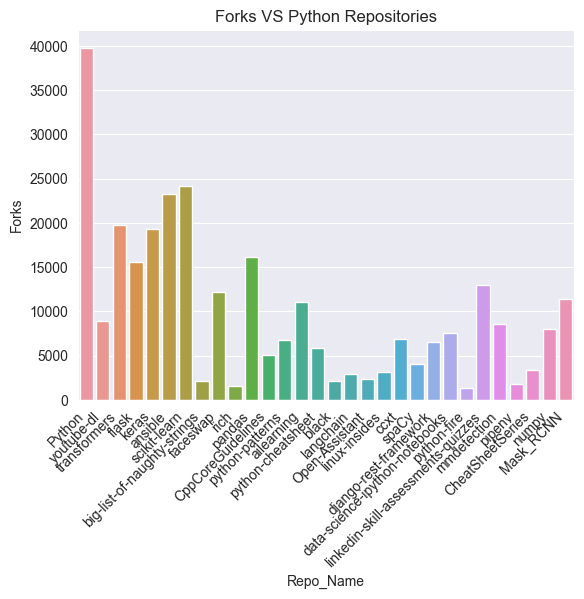

In [121]:
sns.set_style('darkgrid')
ax=sns.barplot(x='Repo_Name',y='Forks',data=df,width=0.8)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.title("Forks VS Python Repositories")
plt.show()

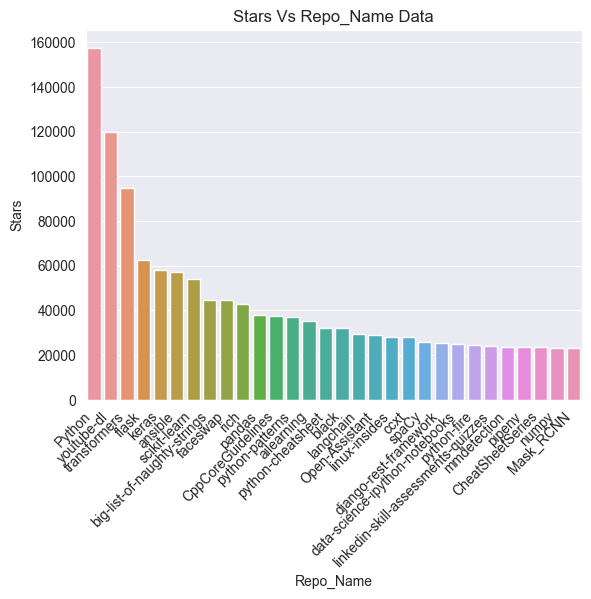

In [122]:
sns.set_style('darkgrid')
ax=sns.barplot(x='Repo_Name',y='Stars',data=df,width=0.8)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.title("Stars Vs Repo_Name Data")
plt.show()


# Getting Java Repos according to the Stars

In [123]:
url = 'https://api.github.com/search/repositories?q=language:java&sort=stars'
headers = {'Accept': 'application/vnd.github.v3+json'}
response = requests.get(url, headers=headers)
print(f"Status code: {response.status_code}")

Status code: 200


In [124]:
dict_java=response.json()
dict_java.keys()

dict_keys(['total_count', 'incomplete_results', 'items'])

In [125]:
repository_dict_java = dict_java['items']
print(f"Repositories returned: {len(repository_dict)}")

Repositories returned: 30


In [126]:
repo_java=repository_dict_java[0]
repo_java

{'id': 22790488,
 'node_id': 'MDEwOlJlcG9zaXRvcnkyMjc5MDQ4OA==',
 'name': 'java-design-patterns',
 'full_name': 'iluwatar/java-design-patterns',
 'private': False,
 'owner': {'login': 'iluwatar',
  'id': 582346,
  'node_id': 'MDQ6VXNlcjU4MjM0Ng==',
  'avatar_url': 'https://avatars.githubusercontent.com/u/582346?v=4',
  'gravatar_id': '',
  'url': 'https://api.github.com/users/iluwatar',
  'html_url': 'https://github.com/iluwatar',
  'followers_url': 'https://api.github.com/users/iluwatar/followers',
  'following_url': 'https://api.github.com/users/iluwatar/following{/other_user}',
  'gists_url': 'https://api.github.com/users/iluwatar/gists{/gist_id}',
  'starred_url': 'https://api.github.com/users/iluwatar/starred{/owner}{/repo}',
  'subscriptions_url': 'https://api.github.com/users/iluwatar/subscriptions',
  'organizations_url': 'https://api.github.com/users/iluwatar/orgs',
  'repos_url': 'https://api.github.com/users/iluwatar/repos',
  'events_url': 'https://api.github.com/users/iluw

In [165]:
for repo in repository_dict_java:

        print(f"\nName: {repo['name']}")
        
        print(f"Owner: {repo['owner']['login']}")

        print(f"Stars: {repo['stargazers_count']}")
        print(f"Forks: {repo['forks_count']}")
        print(f"Open Issues: {repo['open_issues']}")
        print(f"Repository: {repo['html_url']}")
        print(f"Description: {repo['description']}")
    


Name: java-design-patterns
Owner: iluwatar
Stars: 81097
Forks: 24900
Open Issues: 193
Repository: https://github.com/iluwatar/java-design-patterns
Description: Design patterns implemented in Java

Name: LeetCodeAnimation
Owner: MisterBooo
Stars: 72881
Forks: 13879
Open Issues: 18
Repository: https://github.com/MisterBooo/LeetCodeAnimation
Description: Demonstrate all the questions on LeetCode in the form of animation.（用动画的形式呈现解LeetCode题目的思路）

Name: hello-algorithm
Owner: geekxh
Stars: 32245
Forks: 6204
Open Issues: 6
Repository: https://github.com/geekxh/hello-algorithm
Description: 🌍 针对小白的算法训练 | 包括四部分：①.大厂面经 ②.力扣图解  ③.千本开源电子书 ④.百张技术思维导图（项目花了上百小时，希望可以点 star 支持，🌹感谢~）点击下方网站，马上开始刷题！

Name: arthas
Owner: alibaba
Stars: 32221
Forks: 6959
Open Issues: 308
Repository: https://github.com/alibaba/arthas
Description: Alibaba Java Diagnostic Tool Arthas/Alibaba Java诊断利器Arthas

Name: easyexcel
Owner: alibaba
Stars: 27514
Forks: 7030
Open Issues: 238
Repository: https://github.com/alibaba/easyexce

## Converting this into a Dataset

In [202]:
from IPython.display import HTML
import pandas as pd
Created_at=[]
repo_name, repo_link, stars, owner, desc, fork, Year = [], [], [], [], [], [],[]

# assuming you already have the 'repository_dict' list
for repo in repository_dict_java:
    repo_name.append(repo['name'])
    repo_url = repo['html_url']
    
    repo_link.append(f"<a href='{repo_url}'>{repo['name']}</a>")
    Created_at=repo['created_at']
    Year.append(pd.to_datetime(Created_at).year)
    fork.append(repo['forks_count'])
    stars.append(repo['stargazers_count'])
    owner.append(repo['owner']['login'])
    desc.append(repo['description'])

data = {
    'Repo_Name': repo_name,
    'Repo_Link': repo_link,
    'Year': Year,
    'Forks': fork,
    'Stars': stars,
    'Owner': owner,
    'Description': desc
}

df_java = pd.DataFrame(data)

# render the DataFrame with clickable links
HTML(df_java.to_html(render_links=True, escape=False))

,Repo_Name,Repo_Link,Year,Forks,Stars,Owner,Description
0,java-design-patterns,java-design-patterns,2014,24900,81097,iluwatar,Design patterns implemented in Java
1,LeetCodeAnimation,LeetCodeAnimation,2018,13879,72881,MisterBooo,Demonstrate all the questions on LeetCode in the form of animation.（用动画的形式呈现解LeetCode题目的思路）
2,hello-algorithm,hello-algorithm,2020,6204,32245,geekxh,🌍 针对小白的算法训练 | 包括四部分：①.大厂面经 ②.力扣图解 ③.千本开源电子书 ④.百张技术思维导图（项目花了上百小时，希望可以点 star 支持，🌹感谢~）点击下方网站，马上开始刷题！
3,arthas,arthas,2018,6959,32221,alibaba,Alibaba Java Diagnostic Tool Arthas/Alibaba Java诊断利器Arthas
4,easyexcel,easyexcel,2018,7030,27514,alibaba,快速、简洁、解决大文件内存溢出的java处理Excel工具
5,JCSprout,JCSprout,2017,7149,26954,crossoverJie,"👨‍🎓 Java Core Sprout : basic, concurrent, algorithm"
6,halo,halo,2018,8521,26879,halo-dev,强大易用的开源建站工具。
7,seata,seata,2018,8438,23656,seata,":fire: Seata is an easy-to-use, high-performance, open source distributed transaction solution."
8,Signal-Android,Signal-Android,2011,5752,23536,signalapp,A private messenger for Android.
9,libgdx,libgdx,2012,6412,21373,libgdx,Desktop/Android/HTML5/iOS Java game development framework


# Data Visualisation for Java language

In [203]:
import seaborn as sns
import matplotlib.pyplot as plt

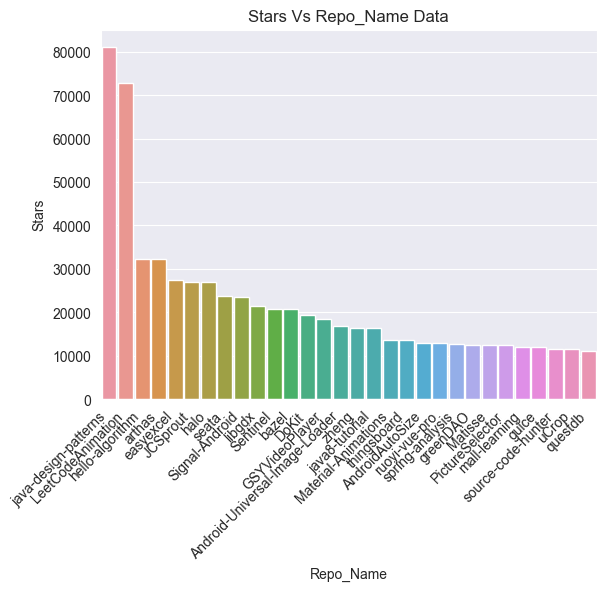

In [204]:
sns.set_style('darkgrid')
ax=sns.barplot(x='Repo_Name',y='Stars',data=df_java,width=0.9)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.title("Stars Vs Repo_Name Data")
plt.show()


C:\Users\aarus\AppData\Local\Temp\ipykernel_22596\2794844560.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


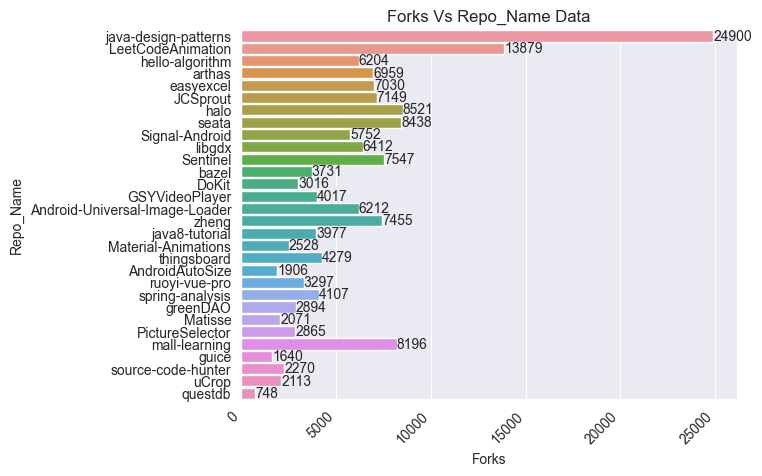

In [205]:
sns.set_style('darkgrid')
ax=sns.barplot(x='Forks',y='Repo_Name',data=df_java,width=0.9)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.bar_label(ax.containers[0])
plt.title("Forks Vs Repo_Name Data")
plt.show()


import pandas as pd
import numpy as np
import panel as pn
pn.extension('tabulator')

import hvplot.pandas

# Make the year slider

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import panel as pn
pn.extension()

# Load data
df_java=

# Define function to plot bar chart for a given year
def plot(year):
    sns.set_style('darkgrid')
    filtered_data = df_java[df_java['Year'] == year]
    ax = sns.barplot(x='Repo_Name', y='Stars', data=filtered_data, width=0.9)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    plt.title(f"Stars Vs Repo_Name Data ({year})")
    plt.show()

# Create slider widget for selecting year
year_slider = pn.widgets.IntSlider(name='Year', start=2005, end=2023, value=2005)

# Create Panel row layout with slider and interactive plot
dashboard = pn.Row(
    year_slider,
    pn.interact(plot, year=year_slider),
)

# Display dashboard
dashboard.servable()
